In [4]:
#Loading Dataset
import tarfile
with tarfile.open("Train.tar","r") as z:
    z.extractall("dataset")

/tmp/ipython-input-3320592410.py:4: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  z.extractall("dataset")


In [5]:
#Importing Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

In [8]:
#Preprocessing
data = []
labels = []
img_size = 32
train_path = "/content/dataset"

for class_id in os.listdir(train_path):
    folder = os.path.join(train_path, class_id)
    for img in os.listdir(folder):
        path = os.path.join(folder, img)
        image = cv2.imread(path)
        image = cv2.resize(image,(img_size,img_size))
        image = image/255.0
        data.append(image)
        labels.append(int(class_id))

X = np.array(data)
y = to_categorical(labels,43)

In [9]:
#Test_train Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
#CNN Model
cnn = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    MaxPooling2D(),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(43,activation="softmax")
])

cnn.compile(optimizer=Adam(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.2896 - loss: 2.5823 - val_accuracy: 0.8948 - val_loss: 0.4212
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.8433 - loss: 0.4890 - val_accuracy: 0.9606 - val_loss: 0.1383
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9347 - loss: 0.2162 - val_accuracy: 0.9800 - val_loss: 0.0742
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9570 - loss: 0.1390 - val_accuracy: 0.9843 - val_loss: 0.0566
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9688 - loss: 0.1015 - val_accuracy: 0.9871 - val_loss: 0.0442
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9742 - loss: 0.0794 - val_accuracy: 0.9898 - val_loss: 0.0358
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9793 - loss: 0.0704 - val_accuracy: 0.9908 - val_loss: 0.0341
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9803 - loss: 0.0624 - 

In [12]:
#Evaluation
cnn_acc = cnn.evaluate(X_test,y_test)[1]
print("CNN Accuracy:",cnn_acc)

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9971 - loss: 0.0089
CNN Accuracy: 0.9963019490242004


In [11]:
#Data Agumentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

cnn.fit(datagen.flow(X_train,y_train,batch_size=64),
        epochs=10,
        validation_data=(X_test,y_test))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.8271 - loss: 0.6410 - val_accuracy: 0.9949 - val_loss: 0.0249
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.9126 - loss: 0.2766 - val_accuracy: 0.9955 - val_loss: 0.0193
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.9374 - loss: 0.2024 - val_accuracy: 0.9957 - val_loss: 0.0146
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.9509 - loss: 0.1672 - val_accuracy: 0.9964 - val_loss: 0.0130
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.9574 - loss: 0.1427 - val_accuracy: 0.9973 - val_loss: 0.0119
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - accuracy: 0.9616 - loss: 0.1258 - val_accuracy: 0.9974 - val_loss: 0.0103
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.9683 - loss: 0.1078 - val_accuracy: 0.9969 - val_loss: 0.0137
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - accuracy: 0.9693 - loss: 0.0981 - val_accurac

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


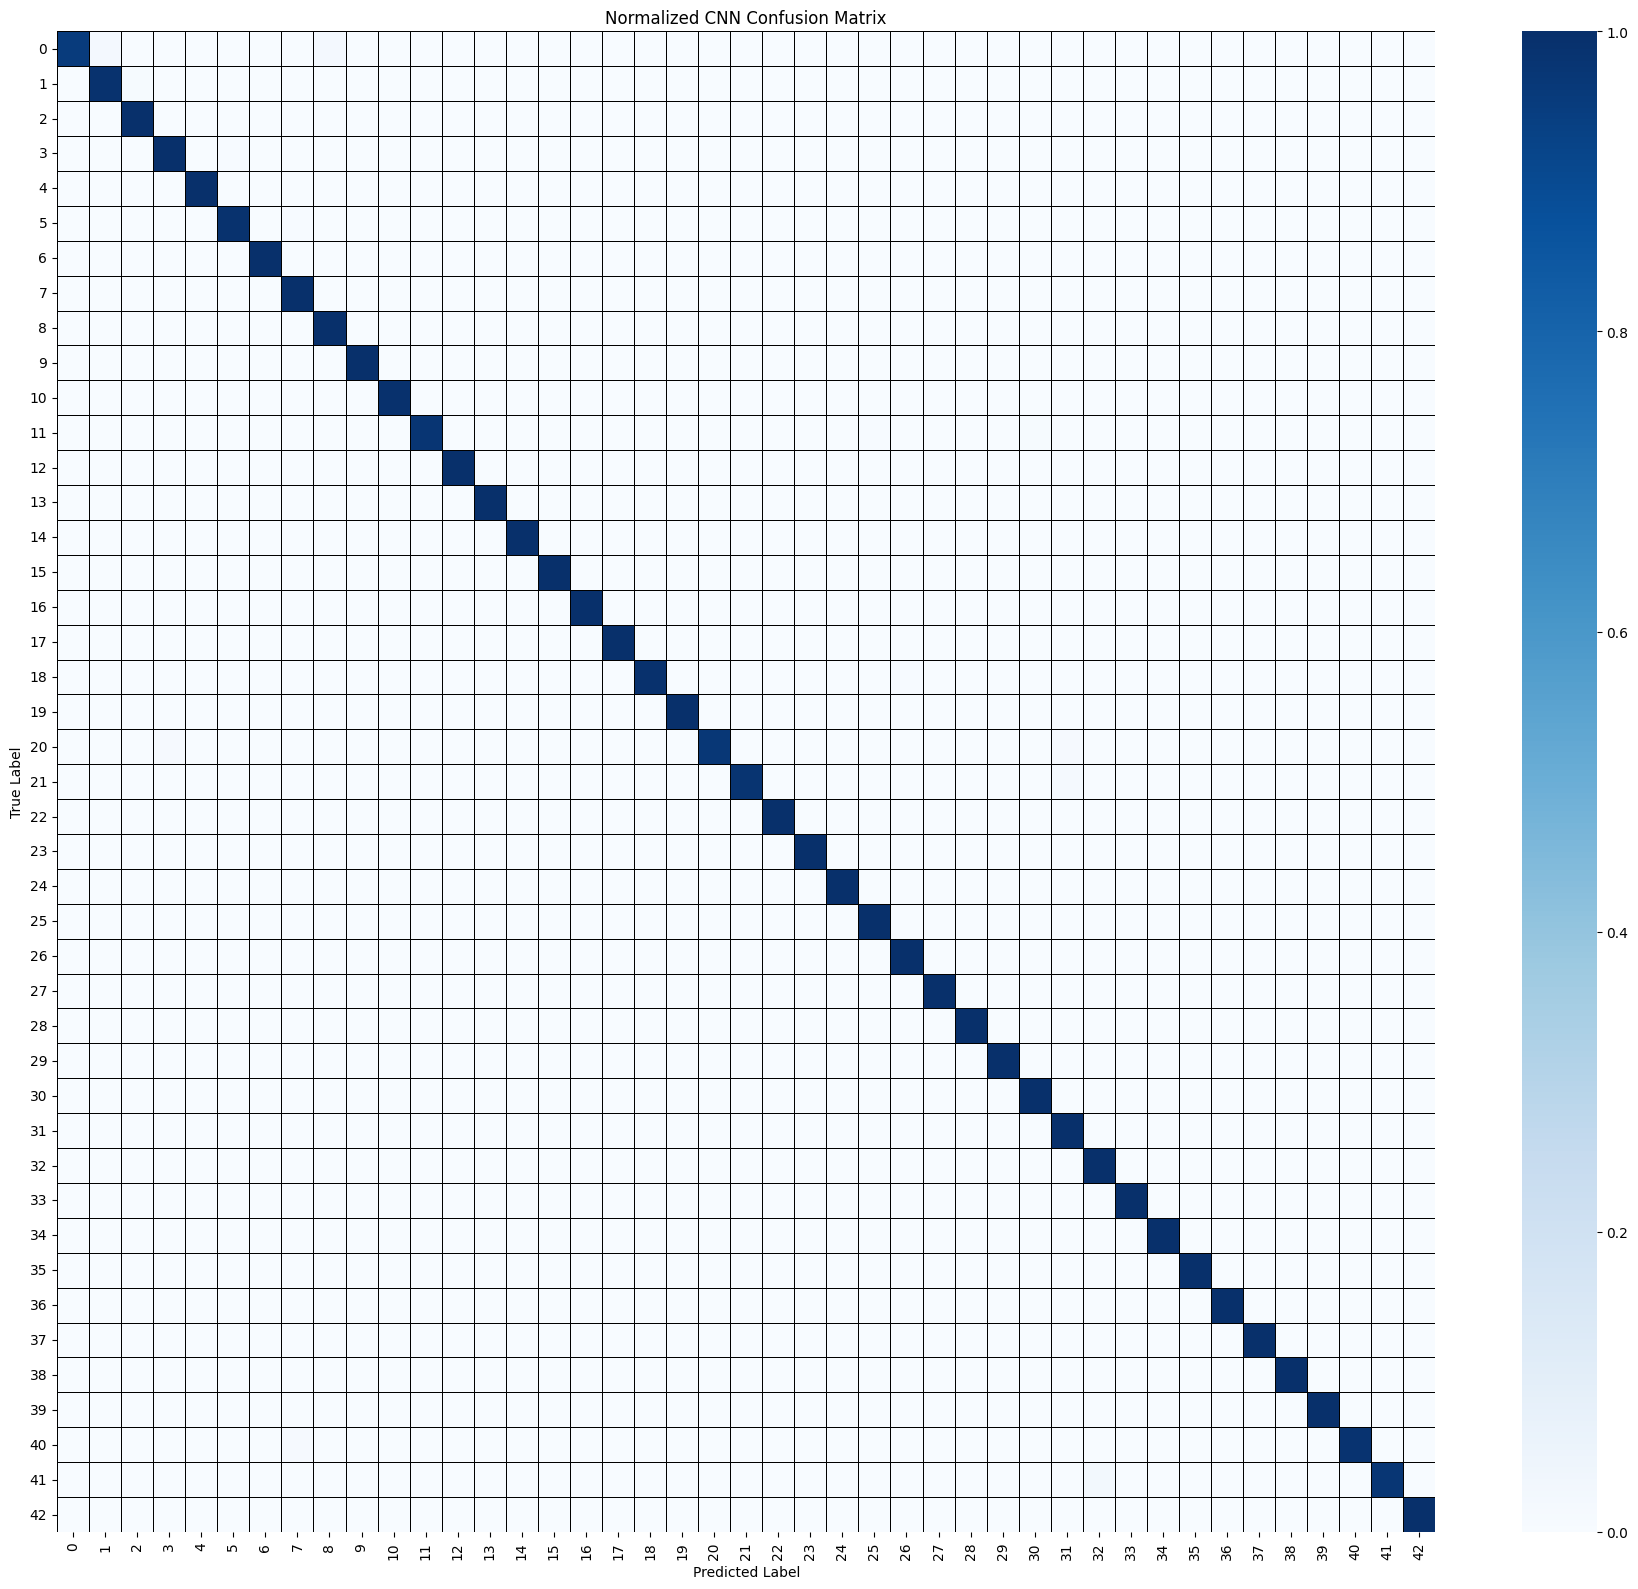

In [14]:
#Visualization
pred = cnn.predict(X_test).argmax(axis=1)
true = y_test.argmax(axis=1)

cm = confusion_matrix(true,pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(18,16))
sns.heatmap(cm_normalized, cmap="Blues",
            xticklabels=range(43), yticklabels=range(43),
            linewidths=.5, linecolor='black')
plt.title("Normalized CNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
#Pretrained Model
base = MobileNetV2(weights="imagenet",include_top=False,input_shape=(32,32,3))
base.trainable=False

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation="relu")(x)
output = Dense(43,activation="softmax")(x)

mobilenet = Model(base.input,output)
mobilenet.compile(optimizer=Adam(0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
mobilenet.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

/tmp/ipython-input-3684909263.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(weights="imagenet",include_top=False,input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.0855 - loss: 3.5608 - val_accuracy: 0.1742 - val_loss: 3.0567
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.2048 - loss: 2.9724 - val_accuracy: 0.2337 - val_loss: 2.7967
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.2509 - loss: 2.7478 - val_accuracy: 0.2589 - val_loss: 2.6528
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.2726 - loss: 2.6185 - val_accuracy: 0.2747 - val_loss: 2.5610
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.2788 - loss: 2.5439 - val_accuracy: 0.2856 - val_loss: 2.4982
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.2929 - loss: 2.4623 - val_accuracy: 0.2935 - val_loss: 2.4501
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.3013 - loss: 2.4274 - val_accuracy: 0.2990 - val_loss: 2.4126
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2

246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3124 - loss: 2.3251
Custom CNN Accuracy: 0.9963019490242004
MobileNet Accuracy: 0.31458812952041626


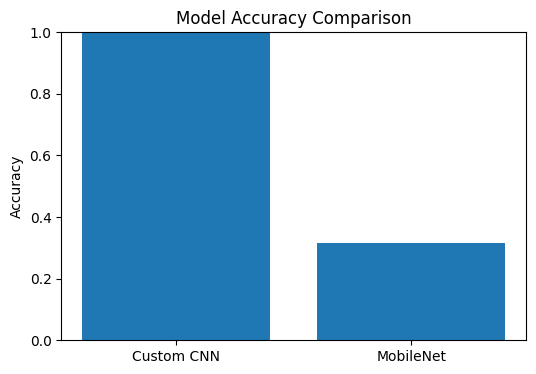

In [16]:
#Comparison
mob_acc = mobilenet.evaluate(X_test,y_test)[1]
print("Custom CNN Accuracy:",cnn_acc)
print("MobileNet Accuracy:",mob_acc)
models = ["Custom CNN", "MobileNet"]
accuracies = [cnn_acc, mob_acc]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()
